In [11]:
from caption import caption_image_beam_search
import cv2
import os
import json
import torch
from matplotlib import pyplot as plt

from models.Captioner import Encoder, DecoderWithAttention

In [2]:
train_file = '/home/gaurangajitk/DL/data/image-caption-data/annotations_train1.txt'
val_file = '/home/gaurangajitk/DL/data/image-caption-data/annotations_val.txt'
data_folder = '/home/gaurangajitk/DL/data/image-caption-data'  # folder with data files saved by create_input_files.py
data_name = '5_cap_per_img_15_min_word_freq'  # base name shared by data files
checkpoint_path = '/home/gaurangajitk/DL/image-captioning/model_checkpoint/best_checkpoint_pt_5_cap_per_img_15_min_word_freq_.pth'

In [8]:
# Load meta image IDs (completely into memory)
with open(os.path.join(data_folder, 'TRAIN_META_IMAGES_' + data_name + '.json'), 'r') as j:
    train_images = json.load(j)
# Load meta image IDs (completely into memory)
with open(os.path.join(data_folder, 'TRAIN_META_CAPTIONS_' + data_name + '.json'), 'r') as j:
    train_captions = json.load(j)

# Load meta image IDs (completely into memory)
with open(os.path.join(data_folder, 'TEST_META_IMAGES_' + data_name + '.json'), 'r') as j:
    test_images = json.load(j)
# Load meta image IDs (completely into memory)
with open(os.path.join(data_folder, 'TEST_META_CAPTIONS_' + data_name + '.json'), 'r') as j:
    test_captions = json.load(j)

word_map_file = os.path.join(data_folder, 'WORDMAP_' + data_name + '.json')
with open(word_map_file, 'r') as j:
    word_map = json.load(j)

rev_word_map = {v: k for k, v in word_map.items()} 

In [5]:
print('Check CUDA')
train_on_gpu = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if(train_on_gpu):
    print('testing on GPU.')
else:
    print('No GPU available, testing on CPU.')

checkpoint = torch.load(checkpoint_path, map_location=device)

start_epoch = checkpoint['epoch'] + 1
best_valid_bleu = checkpoint['best_bleu']

encoder = checkpoint['encoder']
encoder_optimizer = checkpoint['encoder_optimizer']

decoder = checkpoint['decoder']
decoder_optimizer = checkpoint['decoder_optimizer']


Check CUDA
No GPU available, testing on CPU.


a piece of cloth with shadows of hands and partial finger
quality issues are too severe to recognize visual content
quality issues are too severe to recognize visual content
beige article of clothing that have some slight wrinkles
quality issues are too severe to recognize visual content


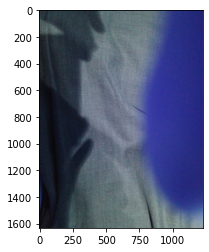

In [28]:
i = 4500
image_path = os.path.join(data_folder, 'train1', train_images[i])
captions = train_captions[i]
for caption in captions:
    print(' '.join(caption))

image = cv2.imread(image_path)
plt.imshow(image)

In [29]:
len(train_images)

7987

In [25]:
seq, alpha = caption_image_beam_search(encoder, decoder, image_path, word_map)

In [26]:
words = [rev_word_map[ind] for ind in seq]
print(' '.join(words[1:-1]))

quality issues are too severe to recognize visual content


In [30]:
for captions in train_captions:
    for c in captions:
        if c == 'quality issues are too severe to recognize visual content'

[[['its',
   'is',
   'a',
   'basil',
   'leaves',
   'container',
   'its',
   'contains',
   'the',
   'net',
   'weight',
   'too'],
  ['quality',
   'issues',
   'are',
   'too',
   'severe',
   'to',
   'recognize',
   'visual',
   'content'],
  ['some', 'basil', 'leaves', 'in', 'a', 'container', 'on', 'a', 'counter'],
  ['a',
   'green',
   'and',
   'white',
   'plastic',
   'condiment',
   'bottle',
   'containing',
   'basil',
   'leaves'],
  ['a',
   'bottle',
   'of',
   'spices',
   'in',
   'a',
   'plastic',
   'container',
   'laying',
   'on',
   'a',
   'surface']],
 [['a',
   'can',
   'of',
   'coca',
   'cola',
   'on',
   'a',
   'counter',
   'is',
   'shown',
   'for',
   'when',
   'one',
   'can',
   'use',
   'a',
   'nice',
   'cold',
   'drink'],
  ['black',
   'counter',
   'with',
   'canisters',
   'kettle',
   'and',
   'can',
   'of',
   'soda'],
  ['a',
   'black',
   'can',
   'of',
   'coca',
   'cola',
   'zero',
   'calorie',
   'soda',
   'is',
 

In [32]:
c = 'Hello World'
c.lower()

'hello world'